In [29]:
#pip install tensorflow as tf

  Created wheel for tf: filename=tf-1.0.0-py3-none-any.whl size=1284 sha256=6d98787ba03e1897fca805fd331e881413c00b5740bba0a68b744907207ea1b6
  Stored in directory: /Users/gerberarpad/Library/Caches/pip/wheels/2c/6e/f8/1e3b5bd4457a9ca1240eb36a4799a0a4a24db275ba5f787a24
Successfully built tf
Note: you may need to restart the kernel to use updated packages.


In [30]:
import tensorflow as tf
import numpy as np

11493376/11490434 [==============================] - 35s 3us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


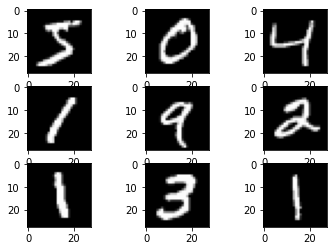

In [2]:

# example of loading the mnist dataset
from keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()


In [17]:
# prepare test data and one hot encode target values
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

print(trainX.shape)

from tensorflow.keras.utils import to_categorical
# one hot encode target values
trainY = tf.keras.utils.to_categorical(trainY)
testY = tf.keras.utils.to_categorical(testY)
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [83]:
print(trainX.shape)
print(type(trainX.shape))

(60000, 28, 28, 1)
<class 'tuple'>


In [40]:
# build a function to prepare test data and one hot encode target values
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

In [48]:
# scale the pixels
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

print(test_norm.shape)
print(train_norm.shape)

(10000, 28, 28, 1)
(60000, 28, 28, 1)


In [99]:
print(type(train_norm))
print(train_norm[0])

<class 'numpy.ndarray'>
[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.       

In [43]:
# scale the pixels as function

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [54]:

# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [59]:

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [61]:

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [51]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(2, 1, 1)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        pyplot.subplot(2, 1, 2)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    pyplot.show()

In [52]:

# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()

In [53]:

# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # evaluate model
    scores, histories = evaluate_model(trainX, trainY)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)

> 98.583
> 98.675
> 98.650
> 98.858
> 98.500


<ipython-input-51-86f430449f6c>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pyplot.subplot(2, 1, 1)
<ipython-input-51-86f430449f6c>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pyplot.subplot(2, 1, 2)


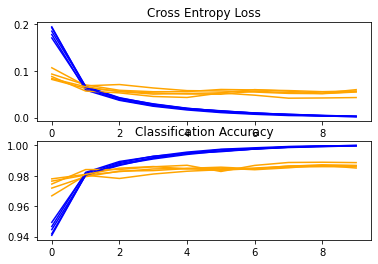

Accuracy: mean=98.653 std=0.119, n=5


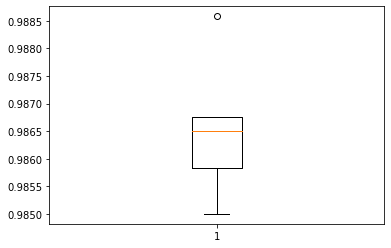

In [55]:
# entry point, run the test harness
run_test_harness()

# Own Part

In [ ]:
# There is no variable assigned to the trained model. And the training and fitting happens
# inside a function so it is not saved. In order to fit a trained model to our own
# example picture I have to train a new model, assign it to a variable and then
# use it to classify the picture.
# define cnn model

In [132]:
# load data
(trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)


# scale the pixels
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0
trainX = train_norm
testX = test_norm

In [133]:
# define model
new_model = Sequential()
new_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
new_model.add(MaxPooling2D((2, 2)))
new_model.add(Flatten())
new_model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
new_model.add(Dense(10, activation='softmax'))
    # compile model
opt = SGD(lr=0.01, momentum=0.9)
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [134]:
#fit model
new_model.fit(trainX, trainY, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1670 - accuracy: 0.9482
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0562 - accuracy: 0.9834
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0385 - accuracy: 0.9884
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0265 - accuracy: 0.9919
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0189 - accuracy: 0.9944
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0145 - accuracy: 0.9957
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0102 - accuracy: 0.9974
Epoch 8/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0074 - accuracy: 0.9983
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0050 - accuracy: 0.9988
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - l

In [135]:
# evaluate model
test_loss, test_acc =new_model.evaluate(testX, testY, verbose=2)


print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0373 - accuracy: 0.9884

Test accuracy: 0.9883999824523926


In [136]:
# load own data

from PIL import Image, ImageFilter


def imageprepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    print(tva)
    return tva

x=imageprepare('/Users/gerberarpad/Desktop/MBF_Skills_Python/Project/converter/IMG8.png')



[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00784313725490196, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00392156862745098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.32941176470588235, 1.0, 1.0, 0.3176470588235294, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4627450980392157, 1.0, 1.0, 1.0, 1.0, 1.0, 0

In [ ]:
print(type(x))
# list

#in the beginning the loaded data looks like this, so we should transform our image to this format and then
#proceed the same way as in the code to get the correct shape
(trainX, trainY), (testX, testY) = mnist.load_data()
print(type(trainX))
print(trainX.shape)
#<class 'numpy.ndarray'>
#(60000, 28, 28)

In [139]:

image = np.array(x, dtype='float32')

converted_image = image.reshape((1,28, 28,1)) # since we only have 1 image testX.reshape((testX.shape[0], 28, 28, 1))
# was not working. image.shape[0] indicates how many entries there are

print(type(image))
print(image.shape)

print(type(converted_image))
print(converted_image.shape)

<class 'numpy.ndarray'>
(784,)
<class 'numpy.ndarray'>
(1, 28, 28, 1)


In [140]:
# use pretrained model to predict own image


predictions = new_model.predict(converted_image)

print(predictions)
print(np.argmax(predictions))

[[5.4944803e-06 2.1514506e-09 3.1534460e-04 1.6898313e-04 1.0315420e-11
  4.7671608e-07 1.7878823e-06 4.2674372e-10 9.9950349e-01 4.3662963e-06]]
8
